In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
from itertools import product
from functools import partial

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd
import seaborn as sns

from pathlib import Path
from sbibm.utils.io import get_tensor_from_csv

In [3]:
root = Path("/home/ben/sci/cnre/infinite/")
len(glob(str(root / "joint/*/*/validation_loss.csv")))
nre_gamma_default = float("Inf")

## list of experiments

In [4]:
df_ref = pd.read_csv("experiment-reference.csv", index_col=0)

## avg log ratio infinite joint

In [5]:
files = [
    "metrics-joint.csv",
]
df = pd.concat([pd.read_csv(file, index_col=0) for file in files], ignore_index=True)
df["gamma"] = df["gamma"].fillna(nre_gamma_default)
print(len(df))
print(df["algorithm"].unique())
print(df["task"].unique())
print(df["num_contrastive_parameters"].unique())
print(df["gamma"].unique())

305
['NRE-B' 'CNRE']
['slcp' 'two_moons' 'gaussian_mixture']
[200 100 150  10  25  75   2  50]
[   inf 1.e+01 1.e+02 1.e-03 1.e-02 1.e+00 1.e-01]


### seaborn fg

In [6]:
linestyles = {2: "solid", 3: "dotted"}

def plot_avg_log_ratios(path: pd.Series, num_blocks: pd.Series, **kwargs):
    ax = plt.gca()
    for index in path.index:
        ax.plot(get_tensor_from_csv(Path(path[index]) / "avg_log_ratios.csv"), linestyle=linestyles[num_blocks[index]], **kwargs)
    ax.set_xscale("log")
    # ax.set_yscale("log")

def plot_validation_loss(path: pd.Series, num_blocks: pd.Series, **kwargs):
    ax = plt.gca()
    for index in path.index:
        ax.plot(get_tensor_from_csv(Path(path[index]) / "validation_loss.csv"), linestyle=linestyles[num_blocks[index]], **kwargs)
    ax.set_xscale("log")
    # ax.set_yscale("log")

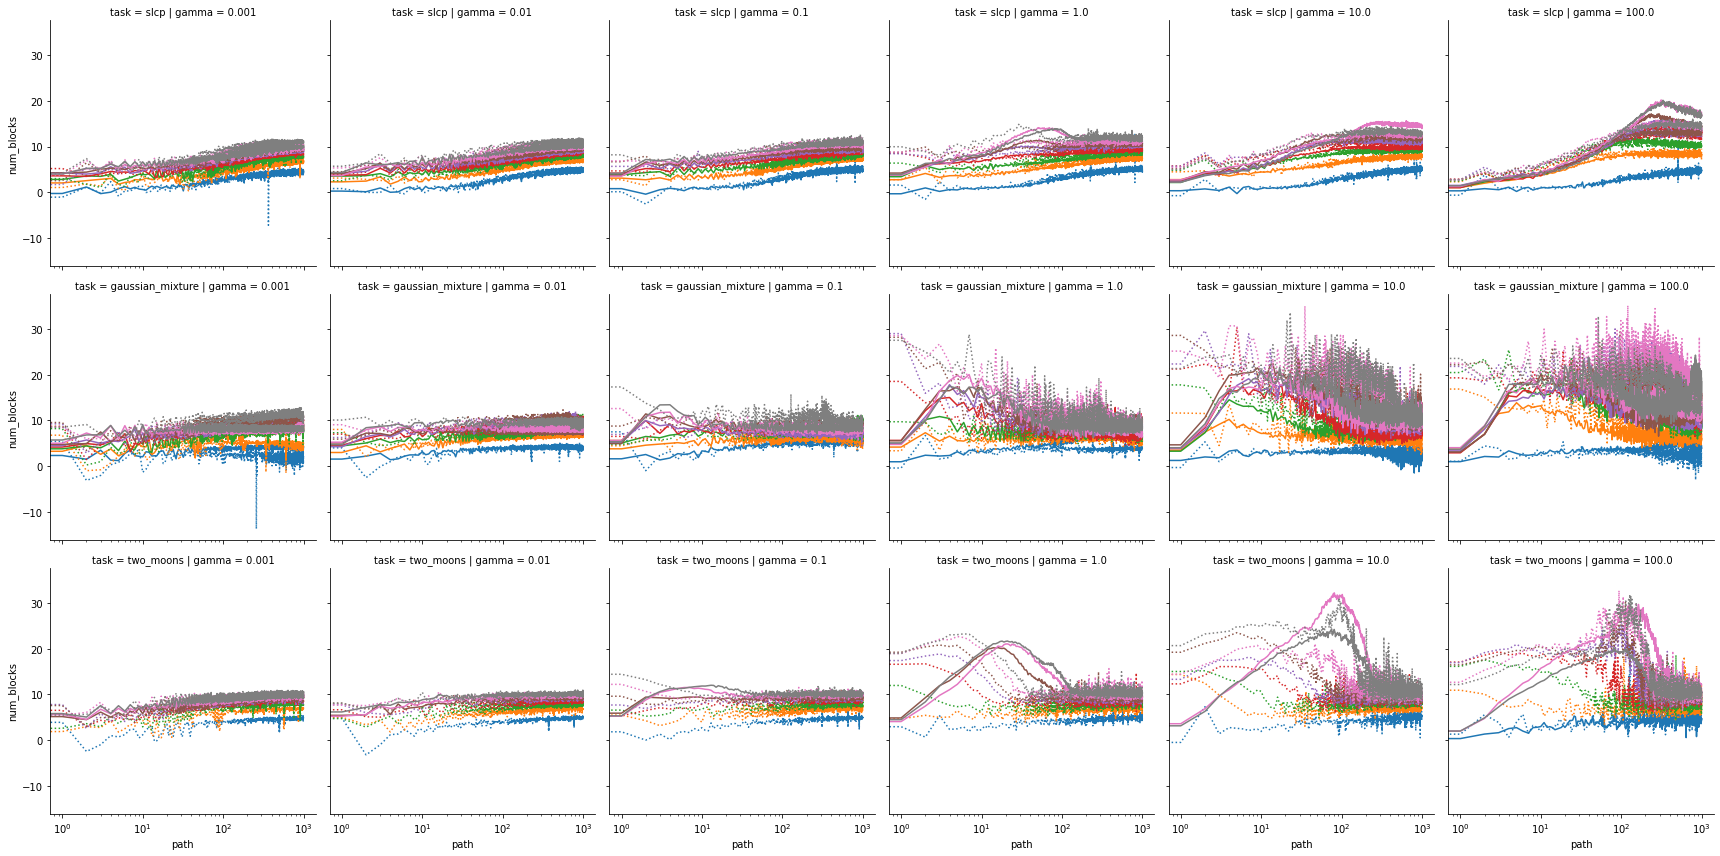

In [7]:
df_cnre = df[df["algorithm"] == "CNRE"]
g = sns.FacetGrid(
    df_cnre, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="gamma", 
    height=4,
)
g.map(plot_avg_log_ratios, "path", "num_blocks")

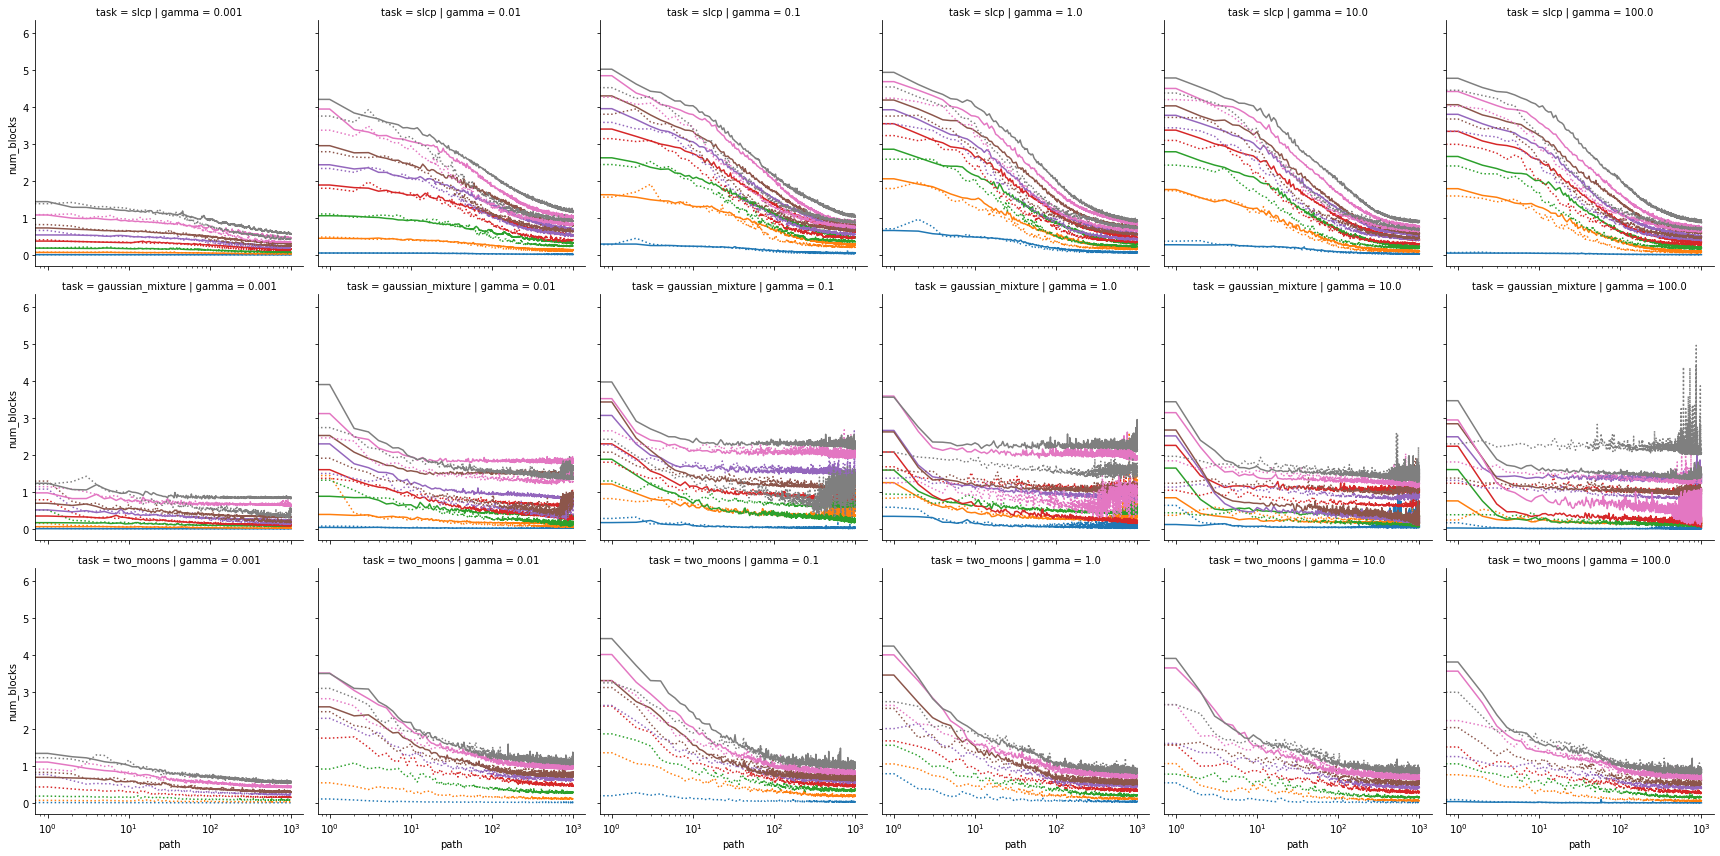

In [8]:
df_cnre = df[df["algorithm"] == "CNRE"]
g = sns.FacetGrid(
    df_cnre, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="gamma", 
    height=4,
)
g.map(plot_validation_loss, "path", "num_blocks")

## Specific example plot

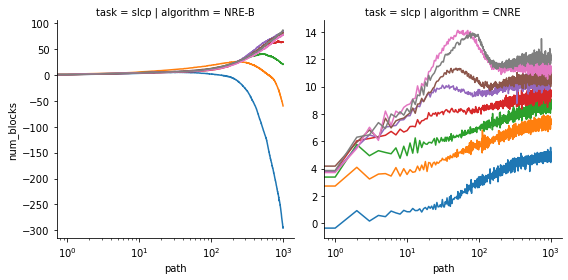

In [9]:
df_specific = df[(df["task"] == "slcp") & (df["gamma"].isin([1.0, nre_gamma_default])) & (df["num_blocks"] == 2)]
g = sns.FacetGrid(
    df_specific, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="algorithm", 
    height=4,
    sharey=False,
)
g.map(plot_avg_log_ratios, "path", "num_blocks")


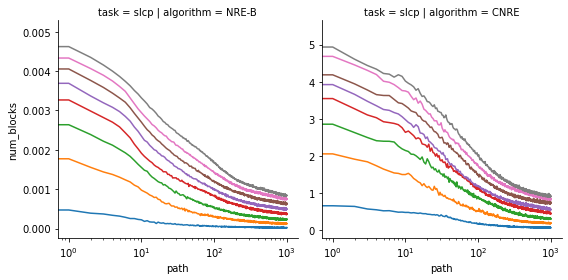

In [10]:
df_specific = df[(df["task"] == "slcp") & (df["gamma"].isin([1.0, nre_gamma_default])) & (df["num_blocks"] == 2)]
g = sns.FacetGrid(
    df_specific, 
    # x="path",  #to look up series
    hue="num_contrastive_parameters",
    row="task",
    col="algorithm", 
    height=4,
    sharey=False,
)
g.map(plot_validation_loss, "path", "num_blocks")

In [11]:
raise NotImplementedError()

NotImplementedError: 

#### cnre

In [ ]:
def get_train_seq_cnre(task: str, gamma: float, filename: str = "avg_log_ratios.csv", num_blocks: int = 2):
    algorithm = "CNRE"

    columns = ["algorithm", "task", "num_contrastive_parameters", "num_blocks", "gamma"]
    grp = df.groupby(columns)

    options = ([algorithm], df["task"].unique(), df["num_contrastive_parameters"].unique(), df["num_blocks"].unique(), [gamma])
    categories = list(product(*options))

    subdfs = []
    failed = []
    for cat in categories:
        try:
            subdfs.append(grp.get_group(cat).iloc[[0], :])
        except KeyError:
            failed.append(cat)
            continue
    subdf = pd.concat(subdfs)
    print(failed)

    d = subdf[(subdf["task"] ==  task) & (subdf["num_blocks"] == num_blocks)]
    d = d.sort_values("num_contrastive_parameters")
    fig, ax = plt.subplots()
    for _, row in d.iterrows():
        ax.plot(get_tensor_from_csv(Path(row["path"]) / filename), label=row["num_contrastive_parameters"])
    ax.legend()

In [ ]:
algorithm = "CNRE"
filename = "avg_log_ratios.csv"
task = "slcp"
num_blocks = 2

columns = ["algorithm", "task", "num_contrastive_parameters", "num_blocks", "gamma"]
grp = df.groupby(columns)

options = ([algorithm], df["task"].unique(), df["num_contrastive_parameters"].unique(), df["num_blocks"].unique(), [1.0])
categories = list(product(*options))

subdfs = []
failed = []
for cat in categories:
    try:
        subdfs.append(grp.get_group(cat).iloc[[0], :])
    except KeyError:
        failed.append(cat)
        continue
subdf = pd.concat(subdfs)
print(failed)

d = subdf[(subdf["task"] ==  task) & (subdf["num_blocks"] == num_blocks)]
d = d.sort_values("num_contrastive_parameters")
fig, ax = plt.subplots()
for _, row in d.iterrows():
    ax.plot(get_tensor_from_csv(Path(row["path"]) / filename), label=row["num_contrastive_parameters"])
ax.legend()

#### nre-b

In [ ]:
algorithm = "NRE-B"
filename = "avg_log_ratios.csv"
task = "slcp"
num_blocks = 2

columns = ["algorithm", "task", "num_contrastive_parameters", "num_blocks"]
grp = df.groupby(columns)

options = ([algorithm], df["task"].unique(), df["num_contrastive_parameters"].unique(), df["num_blocks"].unique())
categories = list(product(*options))

subdfs = []
failed = []
for cat in categories:
    try:
        subdfs.append(grp.get_group(cat).iloc[[0], :])
    except KeyError:
        failed.append(cat)
        continue
subdf = pd.concat(subdfs)
print(failed)

d = subdf[(subdf["task"] ==  task) & (subdf["num_blocks"] == num_blocks)]
d = d.sort_values("num_contrastive_parameters")
fig, ax = plt.subplots()
for _, row in d.iterrows():
    ax.plot(get_tensor_from_csv(Path(row["path"]) / filename), label=row["num_contrastive_parameters"])
ax.legend()